In [39]:
# Importing libraries
library(readxl)
library(dplyr)
library(fastDummies)
library(MASS)

In [40]:
# Importing the data into a dataframe
file_path <- "C:/Users/filip/Documents/EC/R/R kunskapskontroll/Blocket_Data_Group1_excel.xlsx"
car_data <- read_excel(file_path)

In [41]:
# Viewing the data
head(car_data)
str(car_data)
summary(car_data)

Pris,Län,Stad,Bränsle,Växellåda,Miltal,Modellår,Biltyp,Drivning,Hästkrafter,Färg,Motorstorlek,Datum i trafik,Märke,Modell
169900,Kalmar,Kalmar,Bensin,Automat,1111,2018,SUV,Tvåhjulsdriven,1197,Silver,1197,43278,Renault,Captur
499900,Skåne,Vellinge,El,Automat,1750,2021,SUV,Fyrhjulsdriven,514,Vit,NULL,44540,Tesla,Model Y
469900,Västra Götalands,Hisingen,El,Automat,7930,2022,SUV,Fyrhjulsdriven,514,Grå,NULL,44639,Tesla,Model Y
459000,Skåne,Malmö,Bensin,Automat,17400,2018,SUV,Fyrhjulsdriven,510,Röd,2891,43231,Alfa Romeo,Stelvio
459000,Dalarna,Borlänge,Bensin,Automat,8900,2017,Sedan,Fyrhjulsdriven,449,Svart,4395,42923,BMW,750
414900,Stockholm,Botkyrka,El,Automat,4200,2021,Sedan,Tvåhjulsdriven,441,Vit,NULL,44243,Tesla,Model 3


Classes 'tbl_df', 'tbl' and 'data.frame':	695 obs. of  15 variables:
 $ Pris          : num  169900 499900 469900 459000 459000 ...
 $ Län           : chr  "Kalmar" "Skåne" "Västra Götalands" "Skåne" ...
 $ Stad          : chr  "Kalmar" "Vellinge" "Hisingen" "Malmö" ...
 $ Bränsle       : chr  "Bensin" "El" "El" "Bensin" ...
 $ Växellåda     : chr  "Automat" "Automat" "Automat" "Automat" ...
 $ Miltal        : num  1111 1750 7930 17400 8900 ...
 $ Modellår      : num  2018 2021 2022 2018 2017 ...
 $ Biltyp        : chr  "SUV" "SUV" "SUV" "SUV" ...
 $ Drivning      : chr  "Tvåhjulsdriven" "Fyrhjulsdriven" "Fyrhjulsdriven" "Fyrhjulsdriven" ...
 $ Hästkrafter   : num  1197 514 514 510 449 ...
 $ Färg          : chr  "Silver" "Vit" "Grå" "Röd" ...
 $ Motorstorlek  : chr  "1197" "NULL" "NULL" "2891" ...
 $ Datum i trafik: chr  "43278" "44540" "44639" "43231" ...
 $ Märke         : chr  "Renault" "Tesla" "Tesla" "Alfa Romeo" ...
 $ Modell        : chr  "Captur" "Model Y" "Model Y" "Stelvio" 

      Pris            Län                Stad             Bränsle         
 Min.   :100000   Length:695         Length:695         Length:695        
 1st Qu.:174900   Class :character   Class :character   Class :character  
 Median :238900   Mode  :character   Mode  :character   Mode  :character  
 Mean   :252146                                                           
 3rd Qu.:309900                                                           
 Max.   :499900                                                           
  Växellåda             Miltal         Modellår       Biltyp         
 Length:695         Min.   :    0   Min.   :1972   Length:695        
 Class :character   1st Qu.: 3904   1st Qu.:2016   Class :character  
 Mode  :character   Median : 8174   Median :2019   Mode  :character  
                    Mean   : 8694   Mean   :2018                     
                    3rd Qu.:12770   3rd Qu.:2021                     
                    Max.   :29241   Max.   :2024       

In [42]:
# Removing the columns that I believe will not affect the price
car_data_cut <- dplyr::select(car_data, -Stad, -Motorstorlek, -"Datum i trafik", -Modell)
head(car_data_cut)
summary(car_data_cut)

Pris,Län,Bränsle,Växellåda,Miltal,Modellår,Biltyp,Drivning,Hästkrafter,Färg,Märke
169900,Kalmar,Bensin,Automat,1111,2018,SUV,Tvåhjulsdriven,1197,Silver,Renault
499900,Skåne,El,Automat,1750,2021,SUV,Fyrhjulsdriven,514,Vit,Tesla
469900,Västra Götalands,El,Automat,7930,2022,SUV,Fyrhjulsdriven,514,Grå,Tesla
459000,Skåne,Bensin,Automat,17400,2018,SUV,Fyrhjulsdriven,510,Röd,Alfa Romeo
459000,Dalarna,Bensin,Automat,8900,2017,Sedan,Fyrhjulsdriven,449,Svart,BMW
414900,Stockholm,El,Automat,4200,2021,Sedan,Tvåhjulsdriven,441,Vit,Tesla


      Pris            Län              Bränsle           Växellåda        
 Min.   :100000   Length:695         Length:695         Length:695        
 1st Qu.:174900   Class :character   Class :character   Class :character  
 Median :238900   Mode  :character   Mode  :character   Mode  :character  
 Mean   :252146                                                           
 3rd Qu.:309900                                                           
 Max.   :499900                                                           
     Miltal         Modellår       Biltyp            Drivning        
 Min.   :    0   Min.   :1972   Length:695         Length:695        
 1st Qu.: 3904   1st Qu.:2016   Class :character   Class :character  
 Median : 8174   Median :2019   Mode  :character   Mode  :character  
 Mean   : 8694   Mean   :2018                                        
 3rd Qu.:12770   3rd Qu.:2021                                        
 Max.   :29241   Max.   :2024                          

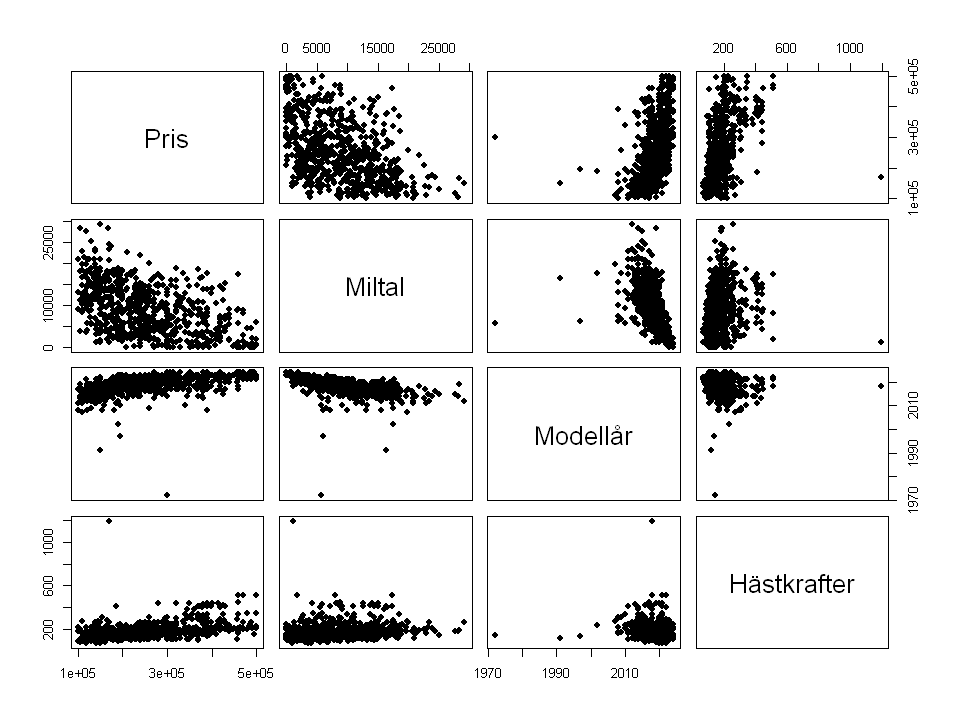

In [43]:
#Inspecting numeric data
car_numeric <- car_data_cut[, sapply(car_data_cut, is.numeric)]

options(repr.plot.width = 8, repr.plot.height = 6)
pairs(car_numeric, pch = 16)

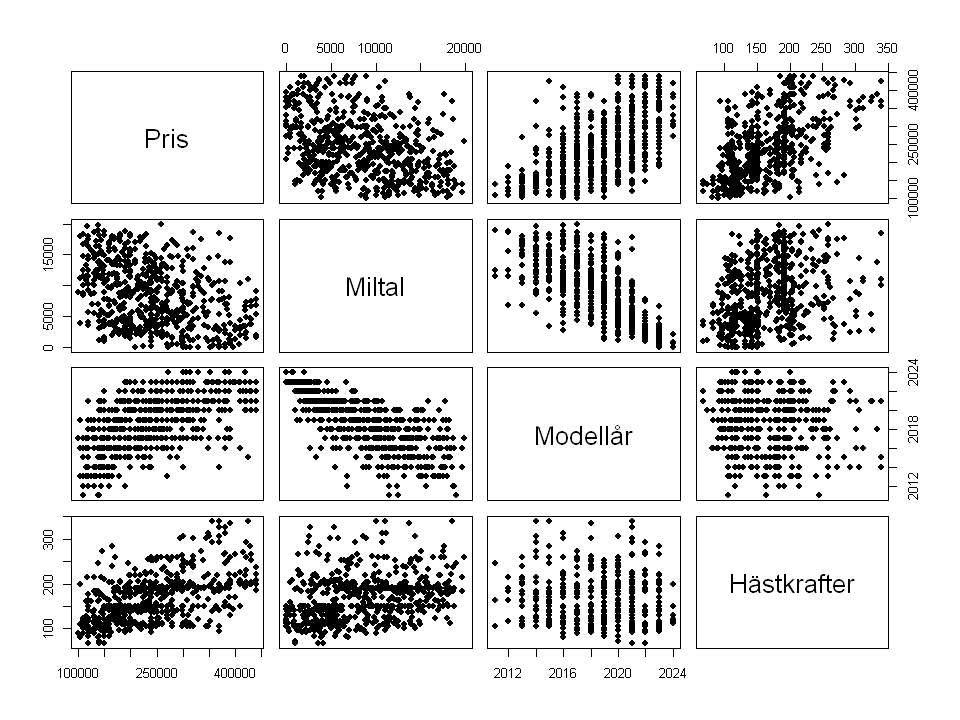

In [44]:
# Filtering out the outliers
z_scores <- scale(car_numeric)
threshold <- 2
outlier_rows <- apply(abs(z_scores) > threshold, 1, any)
car_data_filtered <- car_data_cut[!outlier_rows, ]
pairs(car_data_filtered[, sapply(car_data_filtered, is.numeric)], pch = 16)

In [45]:
# Convert categorical variables to dummy variables
categorical_features <- c("Län", "Bränsle", "Växellåda", "Biltyp", "Drivning", "Färg", "Märke" )

car_dummies <- dummy_cols(car_data_filtered, remove_first_dummy = TRUE, remove_selected_columns = TRUE)
str(car_dummies)
summary(car_dummies)

Classes 'tbl_df', 'tbl' and 'data.frame':	606 obs. of  60 variables:
 $ Pris                       : num  369900 355000 425000 389900 379800 ...
 $ Miltal                     : num  18495 9990 11055 13773 2694 ...
 $ Modellår                   : num  2014 2021 2015 2018 2021 ...
 $ Hästkrafter                : num  340 340 340 334 326 325 313 313 306 306 ...
 $ Län_Gotland                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Län_Jönköping              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Län_Kalmar                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Län_Östergötland           : int  0 0 0 0 0 0 1 0 0 1 ...
 $ Län_Skåne                  : int  0 0 1 0 1 0 0 0 0 0 ...
 $ Län_Stockholm              : int  1 0 0 0 0 1 0 0 1 0 ...
 $ Län_Västra Götalands       : int  0 0 0 1 0 0 0 1 0 0 ...
 $ Bränsle_Diesel             : int  1 0 0 0 0 0 1 0 0 0 ...
 $ Bränsle_El                 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ Bränsle_Miljöbränsle/Hybrid: int  0 1 0 0 0 0 0 1 0 0 ...
 $ Växellåda_Manuell         

      Pris            Miltal         Modellår     Hästkrafter   
 Min.   :100000   Min.   :    0   Min.   :2011   Min.   : 67.0  
 1st Qu.:178925   1st Qu.: 3922   1st Qu.:2017   1st Qu.:124.0  
 Median :234450   Median : 7956   Median :2019   Median :159.0  
 Mean   :241725   Mean   : 8340   Mean   :2019   Mean   :166.7  
 3rd Qu.:299000   3rd Qu.:12226   3rd Qu.:2021   3rd Qu.:192.0  
 Max.   :439900   Max.   :19924   Max.   :2024   Max.   :340.0  
  Län_Gotland     Län_Jönköping       Län_Kalmar      Län_Östergötland
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.0000   Median :0.00000   Median :0.00000   Median :0.0000  
 Mean   :0.0198   Mean   :0.05446   Mean   :0.07591   Mean   :0.1518  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000   Max.   :1.0000  
   Län_Skåne     Län_Stockholm    Län_Västra Göt

In [46]:
# Check for high correlations
correlation_matrix <- cor(car_dummies)
high_correlation_threshold <- 0.7
high_correlation_pairs <- which(abs(correlation_matrix) > high_correlation_threshold & correlation_matrix != 1, arr.ind = TRUE)
 
if (length(high_correlation_pairs) > 0) {
  print("Highly correlated variables:")
  print(high_correlation_pairs)
}

[1] "Highly correlated variables:"
         row col
Modellår   3   2
Miltal     2   3


[1] "Correlation between Miltal and Modellår: -0.753189010746825"


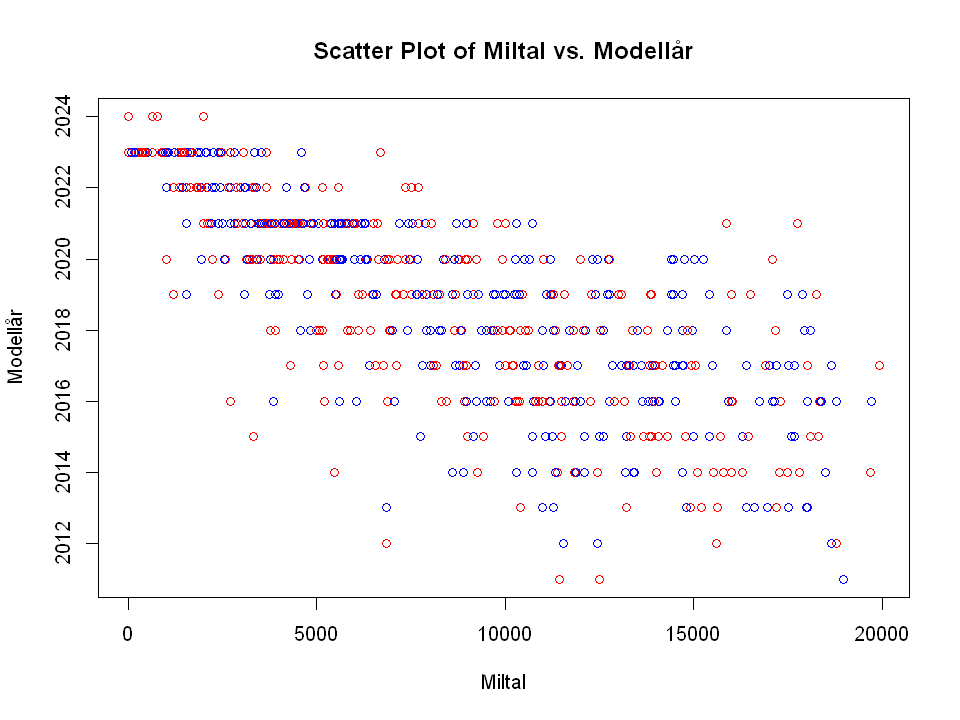

In [47]:
# Calculating correlation between model year and milage. Also plotting them against eachother
cor_mm <- cor(car_dummies$Modellår, car_dummies$Miltal)
print(paste("Correlation between Miltal and Modellår:", cor_mm))

plot(car_dummies$Miltal, car_dummies$Modellår, 
     xlab = "Miltal", ylab = "Modellår", 
     main = "Scatter Plot of Miltal vs. Modellår",
     col = c("blue", "red"))

In [48]:
# Splitting data into train and test
set.seed(123)
train_proportion <- 0.8
train_indices <- sample(nrow(car_dummies), size = round(train_proportion * nrow(car_dummies)), replace = FALSE)

# Split the data into training and test sets
train_data <- car_dummies[train_indices, ]
test_data <- car_dummies[-train_indices, ]

X_train <- train_data[, !names(test_data) %in% "Pris"]
y_train <- train_data$Pris

X_test <- test_data[, !names(test_data) %in% "Pris"]
y_test <- test_data$Pris

In [49]:
#Creating Model Year and Milage training sets
X_train_modellår <- dplyr::select(X_train, -Miltal)

X_train_miltal <- dplyr::select(X_train, -Modellår)

X_train_combo <-  X_train
X_train_combo$Mil_Per_År <- ifelse(X_train_combo$Modellår == 2024, 
                                   X_train_combo$Miltal, 
                                   X_train_combo$Miltal / (2024 - X_train_combo$Modellår))
X_train_combo <- dplyr::select(X_train_combo, -Modellår, -Miltal)

In [50]:
# Creating models for the different training sets
model_modellår <- lm(y_train ~ ., data = X_train_modellår)

model_miltal <- lm(y_train ~ ., data = X_train_miltal)

model_combo <- lm(y_train ~ ., data = X_train_combo)

In [51]:
# Creating results and viewing them
results <- data.frame(
  Model = c("Model Modellår", "Model Miltal", "Model Mil Per År"),
  Adj_R_squared = c(summary(model_modellår)$adj.r.squared,
                    summary(model_miltal)$adj.r.squared,
                    summary(model_combo)$adj.r.squared),
  BIC = c(BIC(model_modellår), BIC(model_miltal), BIC(model_combo))
)
results

Model,Adj_R_squared,BIC
Model Modellår,0.7877566,11914.45
Model Miltal,0.7338230,12024.27
Model Mil Per År,0.4895101,12340.10


In [52]:
# Checking out the chosen model from the result above
summary(model_modellår)


Call:
lm(formula = y_train ~ ., data = X_train_modellår)

Residuals:
   Min     1Q Median     3Q    Max 
-97918 -23131  -1588  19679 145090 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.041e+07  1.658e+06 -24.372  < 2e-16 ***
Modellår                       2.011e+04  8.196e+02  24.531  < 2e-16 ***
Hästkrafter                    6.825e+02  5.500e+01  12.408  < 2e-16 ***
Län_Gotland                   -7.513e+03  1.447e+04  -0.519  0.60382    
Län_Jönköping                 -2.567e+03  8.941e+03  -0.287  0.77416    
Län_Kalmar                    -4.485e+03  7.574e+03  -0.592  0.55407    
Län_Östergötland               5.835e+03  5.836e+03   1.000  0.31799    
Län_Skåne                     -1.858e+04  6.210e+03  -2.993  0.00293 ** 
Län_Stockholm                  1.787e+03  6.225e+03   0.287  0.77417    
`Län_Västra Götalands`        -1.102e+04  6.203e+03  -1.776  0.07647 .  

Warning message:
"not plotting observations with leverage one:
  1, 167, 214, 319, 402, 457"Warning message:
"not plotting observations with leverage one:
  1, 167, 214, 319, 402, 457"

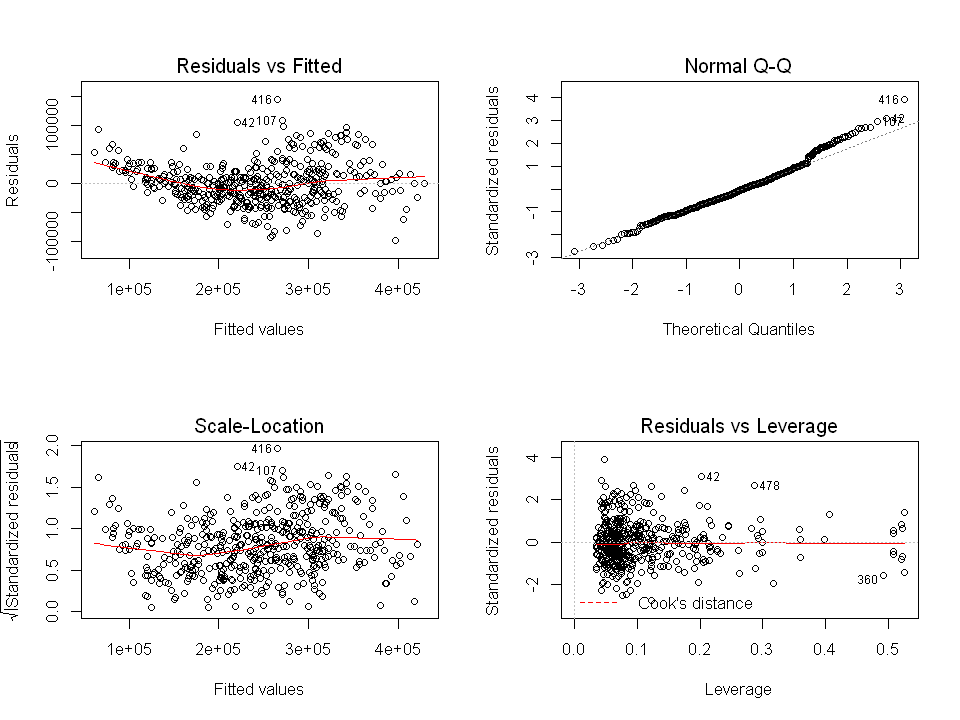

In [53]:
# Plotting diagnostic plots for the chosen model
par(mfrow = c(2, 2))
plot(model_modellår)

In [54]:
# Calculating high leverage values
leverage <- hatvalues(model_modellår)
high_leverage_indices <- which(leverage == 1)
print(high_leverage_indices)

row_numbers <- c(high_leverage_indices)
X_train_modellår[row_numbers, ]

  1 167 214 319 402 457 
  1 167 214 319 402 457 


Modellår,Hästkrafter,Län_Gotland,Län_Jönköping,Län_Kalmar,Län_Östergötland,Län_Skåne,Län_Stockholm,Län_Västra Götalands,Bränsle_Diesel,...,Märke_Porsche,Märke_Renault,Märke_Seat,Märke_Skoda,Märke_Subaru,Märke_Suzuki,Märke_Tesla,Märke_Toyota,Märke_Volkswagen,Märke_Volvo
2022,136,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,141,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021,101,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2018,109,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2020,252,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2017,180,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Removing high leverage values
X_train <- X_train_modellår[-high_leverage_indices, ]
y_train <- y_train[-high_leverage_indices]

In [56]:
#Creating the new model and checking the summary
model1clean <- lm(y_train ~ ., data = X_train)
summary(model1clean)


Call:
lm(formula = y_train ~ ., data = X_train)

Residuals:
   Min     1Q Median     3Q    Max 
-97918 -23385  -1984  19863 145090 

Coefficients: (7 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.043e+07  1.656e+06 -24.409  < 2e-16 ***
Modellår                       2.011e+04  8.196e+02  24.531  < 2e-16 ***
Hästkrafter                    6.825e+02  5.500e+01  12.408  < 2e-16 ***
Län_Gotland                   -7.513e+03  1.447e+04  -0.519  0.60382    
Län_Jönköping                 -2.567e+03  8.941e+03  -0.287  0.77416    
Län_Kalmar                    -4.485e+03  7.574e+03  -0.592  0.55407    
Län_Östergötland               5.835e+03  5.836e+03   1.000  0.31799    
Län_Skåne                     -1.858e+04  6.210e+03  -2.993  0.00293 ** 
Län_Stockholm                  1.787e+03  6.225e+03   0.287  0.77417    
`Län_Västra Götalands`        -1.102e+04  6.203e+03  -1.776  0.07647 .  
Bränsle_

In [57]:
# Removing NA Variables
X_train <- dplyr::select(X_train, -Biltyp_SUV, -Färg_Orange, -Märke_Dacia, -Märke_Fiat, -Märke_Opel, -Märke_Porsche, -Märke_Volvo)

In [58]:
#Creating a new model again and checking summary
model2clean <- lm(y_train ~ ., data = X_train)
summary(model2clean)
num_variables <- length(coefficients(model2clean))
num_variables


Call:
lm(formula = y_train ~ ., data = X_train)

Residuals:
   Min     1Q Median     3Q    Max 
-97918 -23385  -1984  19863 145090 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.043e+07  1.656e+06 -24.409  < 2e-16 ***
Modellår                       2.011e+04  8.196e+02  24.531  < 2e-16 ***
Hästkrafter                    6.825e+02  5.500e+01  12.408  < 2e-16 ***
Län_Gotland                   -7.513e+03  1.447e+04  -0.519  0.60382    
Län_Jönköping                 -2.567e+03  8.941e+03  -0.287  0.77416    
Län_Kalmar                    -4.485e+03  7.574e+03  -0.592  0.55407    
Län_Östergötland               5.835e+03  5.836e+03   1.000  0.31799    
Län_Skåne                     -1.858e+04  6.210e+03  -2.993  0.00293 ** 
Län_Stockholm                  1.787e+03  6.225e+03   0.287  0.77417    
`Län_Västra Götalands`        -1.102e+04  6.203e+03  -1.776  0.07647 .  
Bränsle_Diesel                 1.795e+04  5.793e+

[1] 52

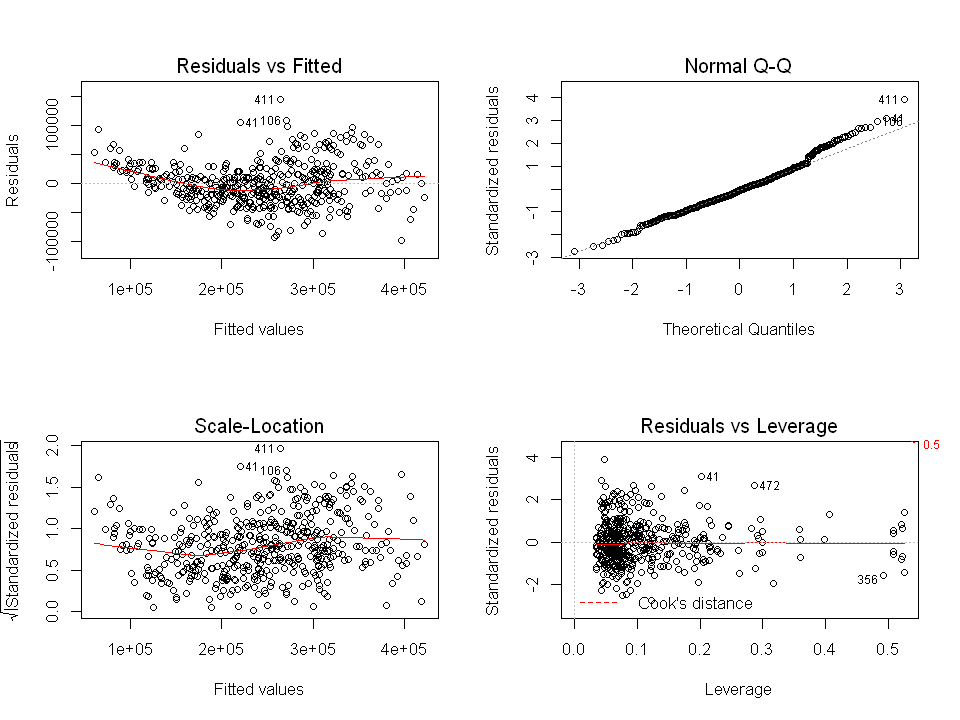

In [59]:
# New diagnostic plots
par(mfrow = c(2, 2))
plot(model2clean)

In [60]:
# Removing observation 411 that i believe effects the normal distrubution
X_train <- X_train[-411, ]
y_train <- y_train[-411]

In [61]:
# Perform backward stepwise selection
car_data <- data.frame(X_train)
names(car_data) <- names(X_train)
car_data$Pris <- y_train

full.model <- lm(Pris ~., data = car_data)
step.model <- stepAIC(full.model, direction = "backward", 
                      trace = FALSE)
summary(step.model)
num_variables <- length(coefficients(step.model))
num_variables


Call:
lm(formula = Pris ~ Modellår + Hästkrafter + Län_Skåne + `Län_Västra Götalands` + 
    Bränsle_Diesel + `Bränsle_Miljöbränsle/Hybrid` + Växellåda_Manuell + 
    Biltyp_Coupé + Biltyp_Halvkombi + Biltyp_Kombi + Biltyp_Sedan + 
    Färg_Grön + Färg_Vit + Märke_Ford + Märke_Hyundai + Märke_Jeep + 
    Märke_Kia + `Märke_Land Rover` + Märke_Mazda + `Märke_Mercedes-Benz` + 
    Märke_Mitsubishi + Märke_Nissan + Märke_Renault + Märke_Seat + 
    Märke_Toyota + Märke_Volkswagen, data = car_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-104744  -23521   -3449   19414  119575 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -4.018e+07  1.491e+06 -26.951  < 2e-16 ***
Modellår                       1.998e+04  7.376e+02  27.087  < 2e-16 ***
Hästkrafter                    7.094e+02  4.245e+01  16.713  < 2e-16 ***
Län_Skåne                     -2.054e+04  5.201e+03  -3.949 9.11e-05 ***
`Län_Västra Götalands`   

[1] 27

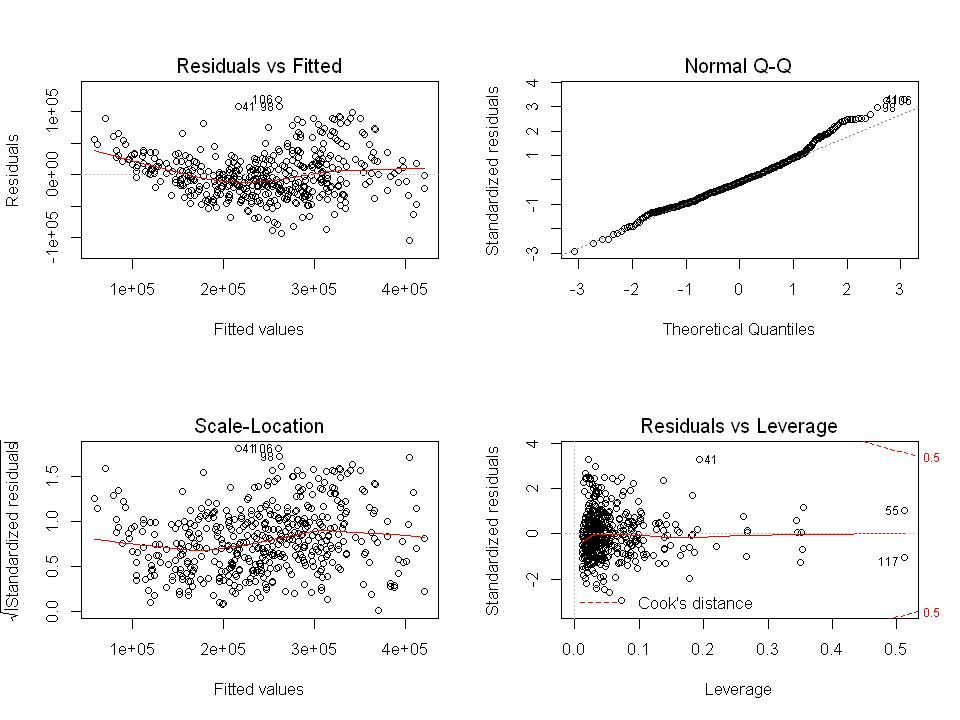

In [62]:
# Final diagnostic plot
par(mfrow = c(2, 2))
plot(step.model)

In [63]:
#Prediction on the test set
predictions <- predict(step.model, newdata = X_test)
rmse <- sqrt(mean((y_test - predictions)^2))
print(rmse)
mean(y_test)

[1] 42052.71


[1] 236294.2

In [64]:
#Testing my own car with a value of 65-70k value in todays market
my_car <- c(Modellår = 2016, Hästkrafter = 75, Län_Gotland = 0, Län_Jönköping = 0, 
            Län_Kalmar = 0, Län_Östergötland = 0, Län_Skåne = 0, Län_Stockholm = 1, 
            'Län_Västra Götalands' = 0, Bränsle_Diesel = 0, Bränsle_El = 0, 
            'Bränsle_Miljöbränsle/Hybrid' = 0, Växellåda_Manuell = 1, 
            Biltyp_Coupé = 0, Biltyp_Halvkombi = 1, Biltyp_Kombi = 0, Biltyp_Sedan = 0, Drivning_Tvåhjulsdriven = 1, 
            Färg_Brun = 0, Färg_Grå = 0, Färg_Grön = 0, Färg_Röd = 0, Färg_Silver = 0, 
            Färg_Svart = 0, Färg_Vit = 1, Märke_Audi = 0, Märke_BMW = 0, Märke_Citroën = 0, Märke_Cupra = 0, 
            Märke_Ford = 0, Märke_Honda = 0, Märke_Hyundai = 0, Märke_Jaguar = 0, Märke_Jeep = 0, 
            Märke_Kia = 0, 'Märke_Land Rover' = 0, Märke_Lexus = 0, Märke_Mazda = 0, 'Märke_Mercedes-Benz' = 0, Märke_MINI = 0, 
            Märke_Mitsubishi = 0, Märke_Nissan = 0, Märke_Peugeot = 0, Märke_Renault = 0, Märke_Seat = 0, Märke_Skoda = 0, 
            Märke_Subaru = 0, Märke_Suzuki = 0, Märke_Tesla = 0, Märke_Toyota = 0, Märke_Volkswagen = 1)

my_car_df <- data.frame(t(my_car))
names(my_car_df) <- names(my_car)
my_car_df
prediction_my_car <- predict(step.model, newdata = my_car_df)
print(prediction_my_car)

Modellår,Hästkrafter,Län_Gotland,Län_Jönköping,Län_Kalmar,Län_Östergötland,Län_Skåne,Län_Stockholm,Län_Västra Götalands,Bränsle_Diesel,...,Märke_Nissan,Märke_Peugeot,Märke_Renault,Märke_Seat,Märke_Skoda,Märke_Subaru,Märke_Suzuki,Märke_Tesla,Märke_Toyota,Märke_Volkswagen
2016,75,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


    1 
65418 
